In [55]:
import numpy as np                
import pandas as pd               
import matplotlib.pyplot as plt   
import seaborn as sns

In [56]:
df = pd.read_csv("D:/Ảnh liên quan khoá luận/long le.csv")
df = df.drop(columns=['Unnamed: 0']) # loại bỏ cột Unnamed

In [57]:
df.columns = ['Pub_CID'+str(i+1) if i<100 else col for i,col in enumerate(df.columns)]

df.columns = ['Pub_Excipient'+str(i+1) if 99<i<200 else col for i,col in enumerate(df.columns)]

# Giữ nguyên 45 cột còn lại
df = df[df.columns[:200].tolist()+df.columns[245-45:].tolist()]


In [58]:
df = df.drop(df.tail(3).index)
df = df.dropna()

In [59]:
count_0, count_1 = df.Outcome1.value_counts()
df_class_0 = df[df["Outcome1"] == 0]
df_class_1 = df[df["Outcome1"] == 1]
df_class_0_over = df_class_0.sample(count_0, replace = True)
df_test_over = pd.concat([df_class_1, df_class_0_over], axis = 0)

In [60]:
y = df_test_over['Outcome1'].values
X = df_test_over.drop(columns=["mol2vec_API","mol2vec_Excipient", "sentence_Excipient", "sentence_API","Structure_API","Structure_Excipient","mol_API", "mol_Excipient","Output Value"], axis =1)

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_remain, y_train, y_remain = train_test_split(X, y, test_size=.2, random_state=816)
X_val, X_test, y_val, y_test = train_test_split(X_remain, y_remain, test_size=.5, random_state=817)

In [62]:
#### Mô hình RandomForestRegressor

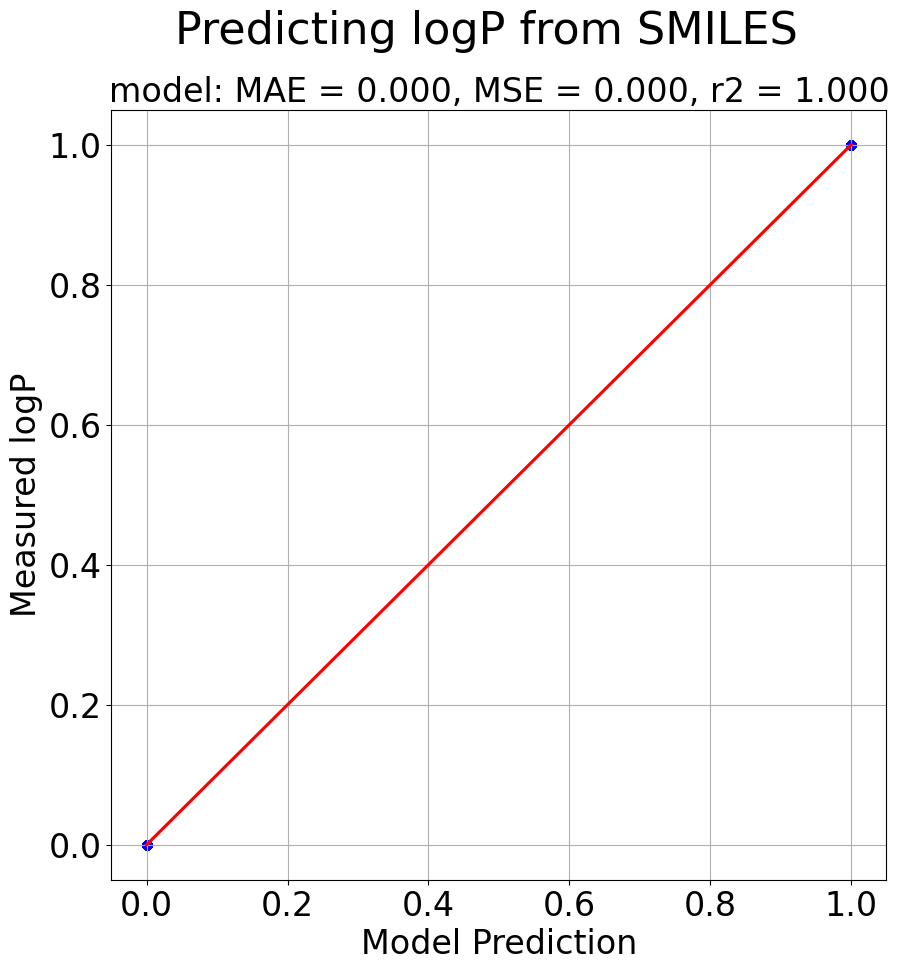

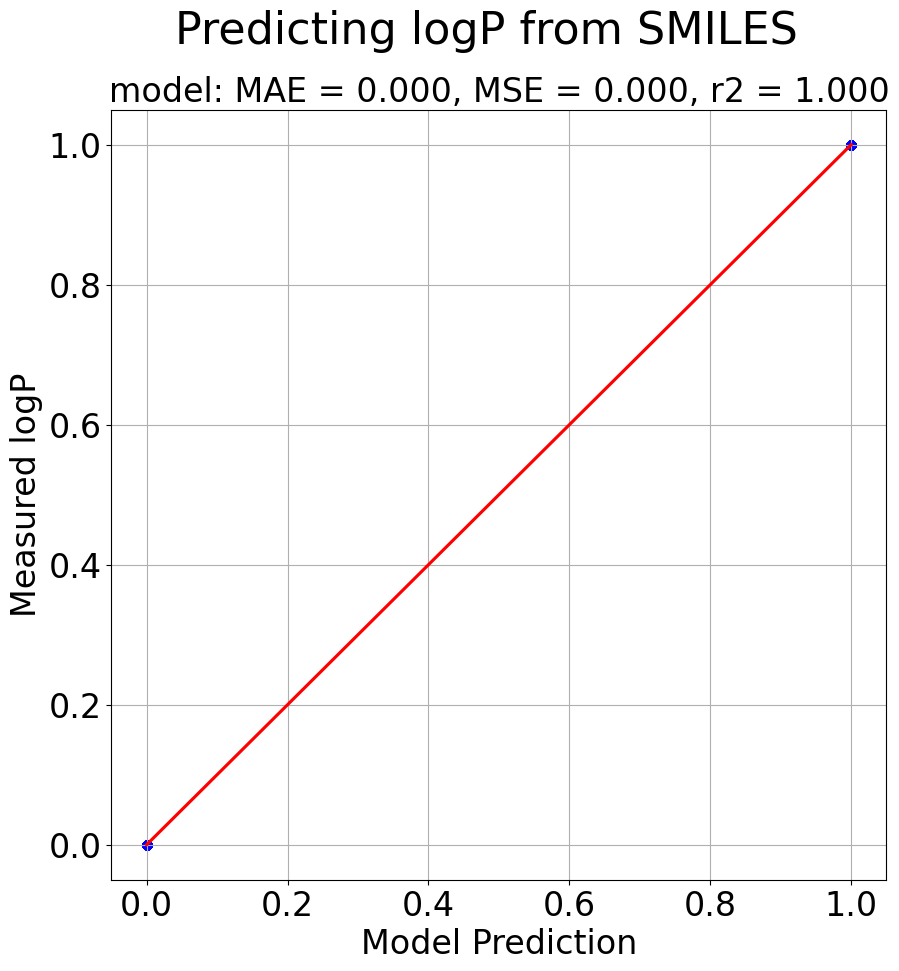

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_grid_RF = {
        'n_estimators': [10, 50, 100],
        'max_depth': [5, 15, 25],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
}
grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid = param_grid_RF, 
                           scoring = 'neg_mean_squared_error',
                           cv = 5, n_jobs = -1, verbose = 0)
grid_search_rf.fit(X_train, y_train)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def plot_evaluation(model, X_test, y_test, title="Test"):
    prediction = np.squeeze(model.predict(X_test))
    mae = mean_absolute_error(y_test, prediction)
    mse = mean_squared_error(y_test, prediction)
    r2 = r2_score(y_test, prediction)
    plt.figure(figsize=(10,10))
    sns.regplot(x=prediction, y=y_test, scatter_kws={"color": "blue"}, line_kws={"color": "red"});
    plt.xlabel('Model Prediction', fontsize=24);
    plt.ylabel('Measured logP', fontsize=24);
    plt.xticks(fontsize=24);
    plt.yticks(fontsize=24);
    plt.suptitle('Predicting logP from SMILES', fontsize=32);
    plt.title(f'{title}: MAE = {mae:.3f}, MSE = {mse:.3f}, r2 = {r2:.3f}', fontsize=24);
    plt.grid(True)
plot_evaluation(grid_search_rf, X_test, y_test, "model")
plot_evaluation(grid_search_rf, X_train, y_train, "model")


In [64]:
#### Mô hình RidgeCV

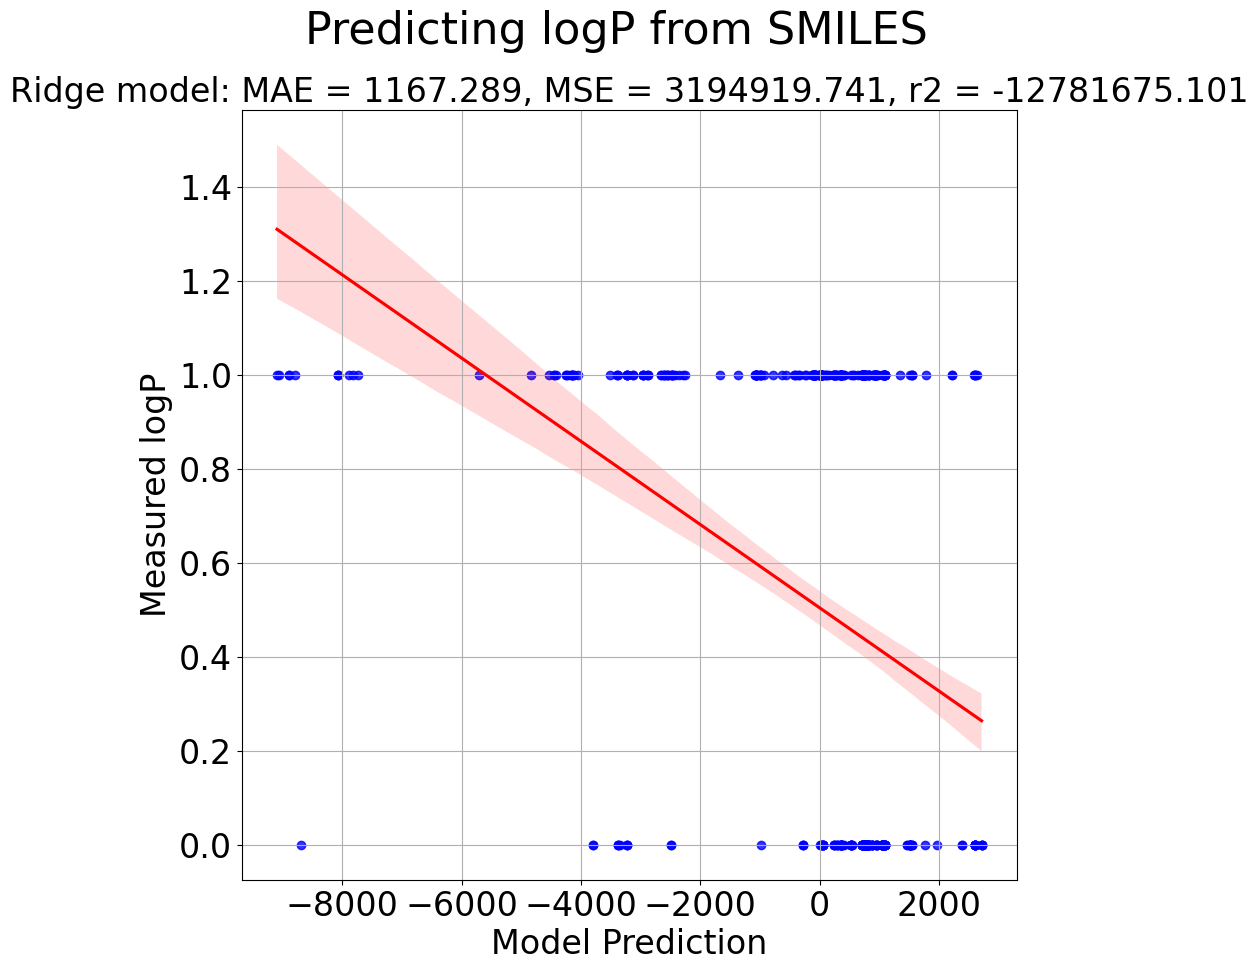

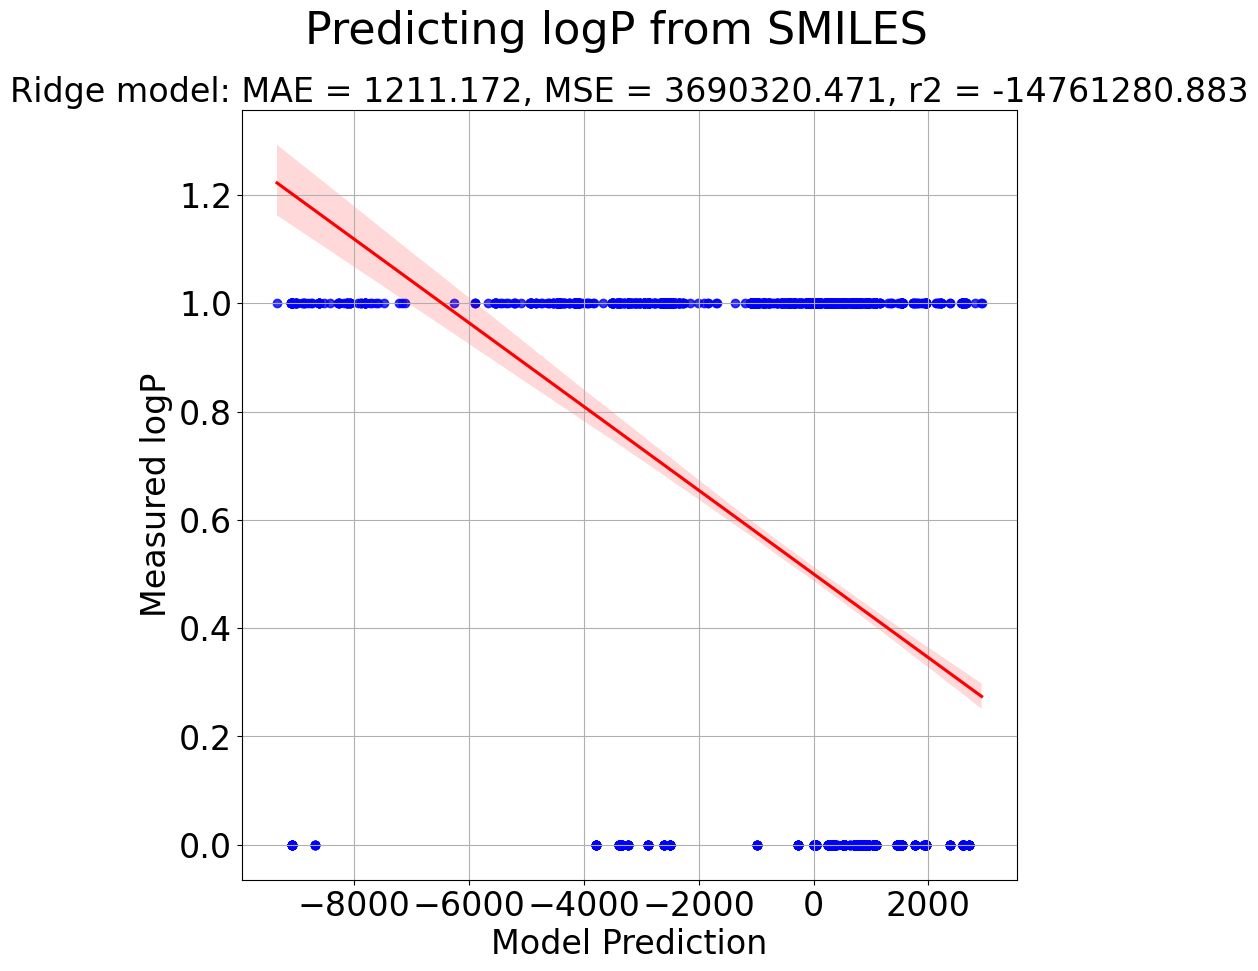

In [65]:
y = df_test_over['Outcome1'].values
X = df_test_over.drop(columns=["mol2vec_API","mol2vec_Excipient", "sentence_Excipient", "sentence_API","Structure_API","Structure_Excipient","mol_API", "mol_Excipient","Output Value"], axis =1)
from sklearn.model_selection import train_test_split
X_train, X_remain, y_train, y_remain = train_test_split(X, y, test_size=.2, random_state=816)
X_val, X_test, y_val, y_test = train_test_split(X_remain, y_remain, test_size=.5, random_state=817)

from sklearn.linear_model import RidgeCV
ridge_model = RidgeCV()
ridge_model.fit(X_train, y_train)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def plot_evaluation(model, X_test, y_test, title="Test"):
    prediction = np.squeeze(model.predict(X_test))
    mae = mean_absolute_error(y_test, prediction)
    mse = mean_squared_error(y_test, prediction)
    r2 = r2_score(y_test, prediction)
    plt.figure(figsize=(10,10))
    sns.regplot(x=prediction, y=y_test, scatter_kws={"color": "blue"}, line_kws={"color": "red"});
    plt.xlabel('Model Prediction', fontsize=24);
    plt.ylabel('Measured logP', fontsize=24);
    plt.xticks(fontsize=24);
    plt.yticks(fontsize=24);
    plt.suptitle('Predicting logP from SMILES', fontsize=32);
    plt.title(f'{title}: MAE = {mae:.3f}, MSE = {mse:.3f}, r2 = {r2:.3f}', fontsize=24);
    plt.grid(True)
plot_evaluation(ridge_model, X_test, y_test, "Ridge model")
plot_evaluation(ridge_model, X_train, y_train, "Ridge model")

In [66]:
#### Mô hình LogisticRegression

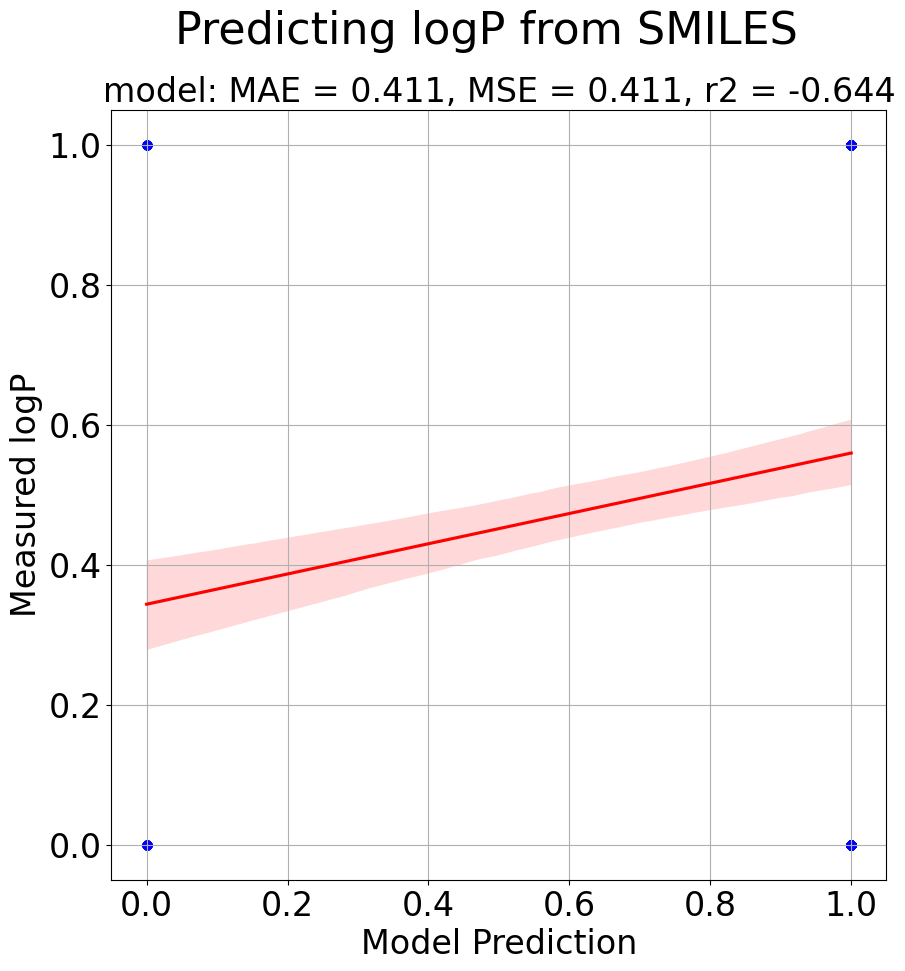

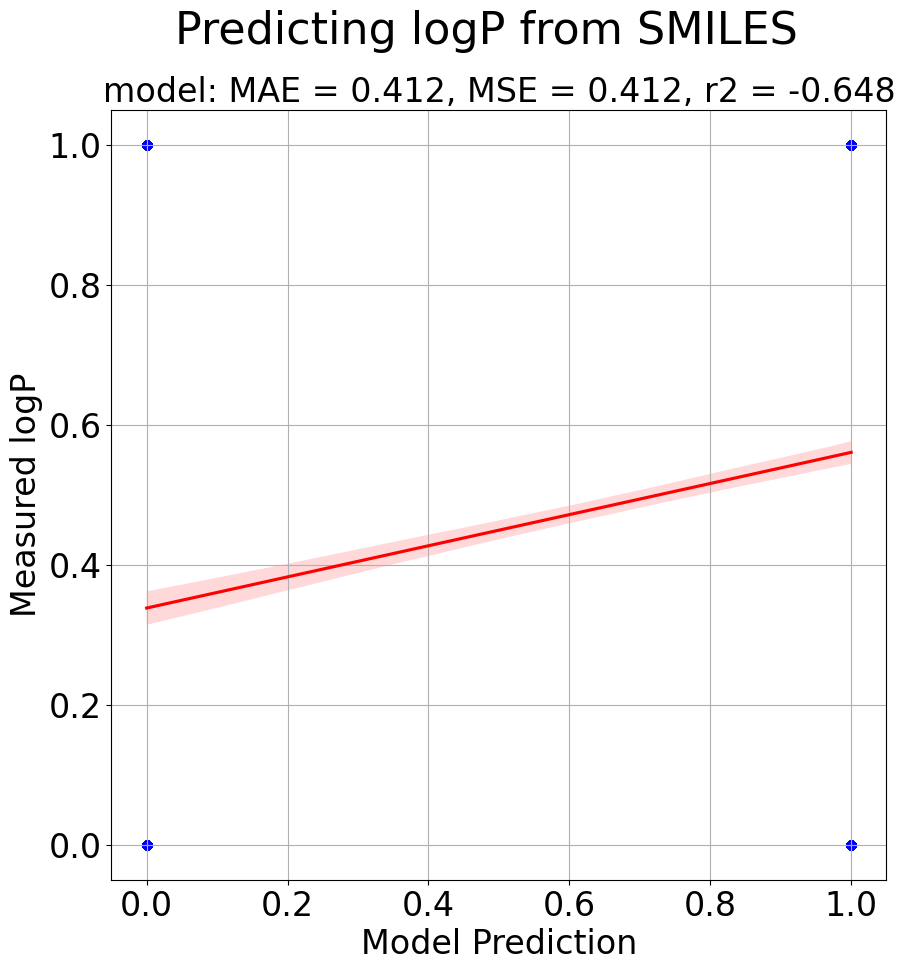

In [67]:
y = df_test_over['Outcome1'].values
X = df_test_over.drop(columns=["mol2vec_API","mol2vec_Excipient", "sentence_Excipient", "sentence_API","Structure_API","Structure_Excipient","mol_API", "mol_Excipient","Output Value"], axis =1)
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
X_train, X_remain, y_train, y_remain = train_test_split(X, y, test_size=.2, random_state=816)
X_val, X_test, y_val, y_test = train_test_split(X_remain, y_remain, test_size=.5, random_state=817)
model = LogisticRegression()
model.fit(X_train, y_train)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def plot_evaluation(model, X_test, y_test, title="Test"):
    prediction = np.squeeze(model.predict(X_test))
    mae = mean_absolute_error(y_test, prediction)
    mse = mean_squared_error(y_test, prediction)
    r2 = r2_score(y_test, prediction)
    plt.figure(figsize=(10,10))
    sns.regplot(x=prediction, y=y_test, scatter_kws={"color": "blue"}, line_kws={"color": "red"});
    plt.xlabel('Model Prediction', fontsize=24);
    plt.ylabel('Measured logP', fontsize=24);
    plt.xticks(fontsize=24);
    plt.yticks(fontsize=24);
    plt.suptitle('Predicting logP from SMILES', fontsize=32);
    plt.title(f'{title}: MAE = {mae:.3f}, MSE = {mse:.3f}, r2 = {r2:.3f}', fontsize=24);
    plt.grid(True)
plot_evaluation(model, X_test, y_test, "model")
plot_evaluation(model, X_train, y_train, "model")

In [78]:
#### Mô hình LinearRegression

In [74]:
y = df_test_over['Outcome1'].values
X = df_test_over.drop(columns=["mol2vec_API","mol2vec_Excipient", "sentence_Excipient", "sentence_API","Structure_API","Structure_Excipient","mol_API", "mol_Excipient","Output Value"], axis =1)
y = df['Outcome1'].values
X = df.drop(columns=["mol2vec_API","mol2vec_Excipient", "sentence_Excipient", "sentence_API","Structure_API","Structure_Excipient","mol_API", "mol_Excipient","Output Value"], axis =1)
from sklearn.model_selection import train_test_split
X_train, X_remain, y_train, y_remain = train_test_split(X, y, test_size=.2, random_state=816)
X_val, X_test, y_val, y_test = train_test_split(X_remain, y_remain, test_size=.5, random_state=817)



In [80]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

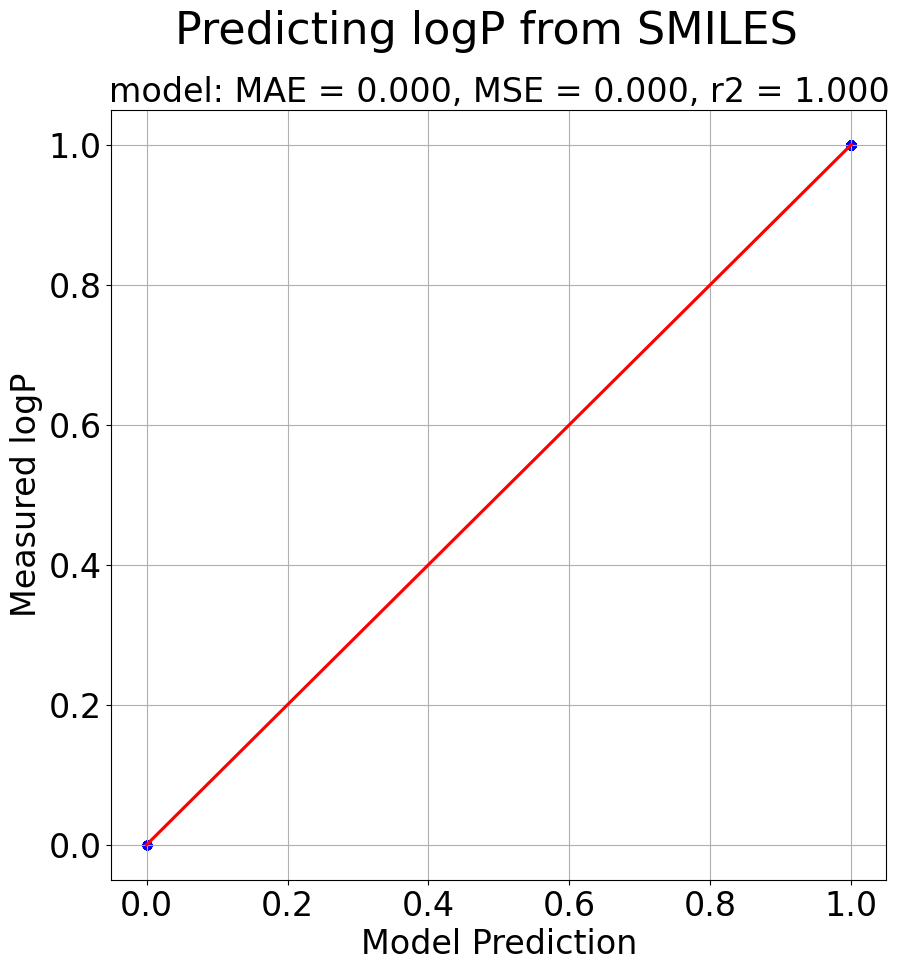

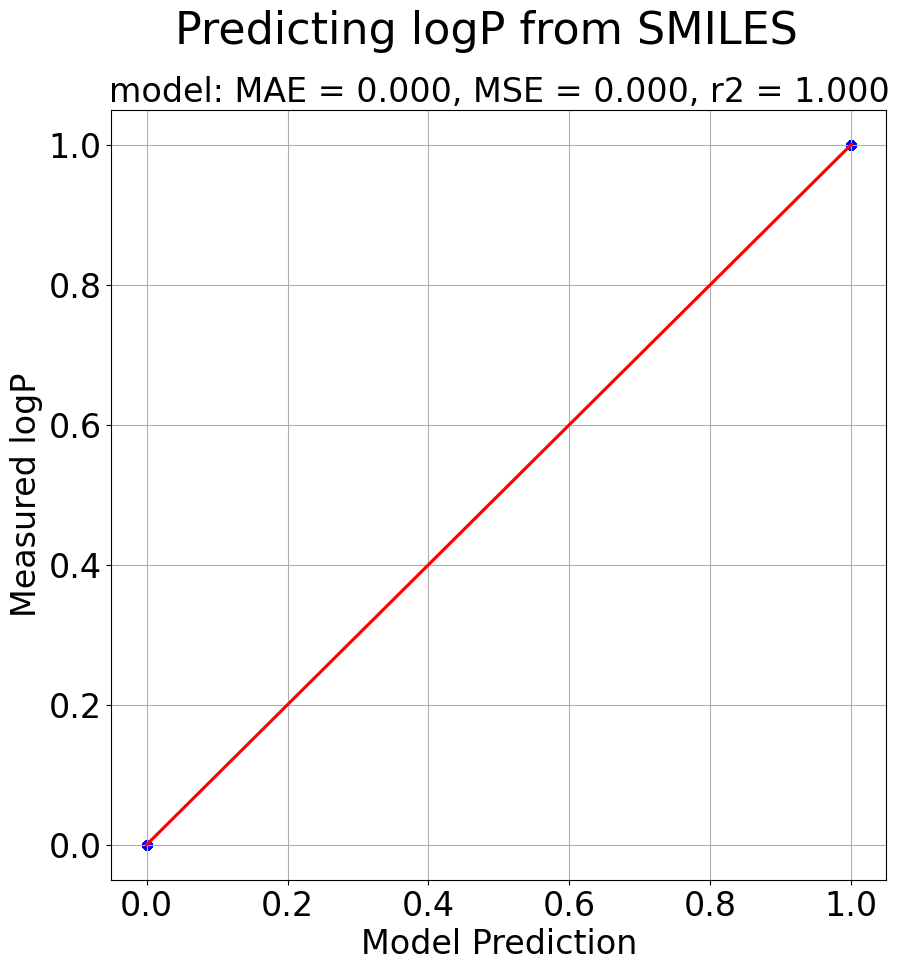

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def plot_evaluation(model, X_test, y_test, title="Test"):
    prediction = np.squeeze(model.predict(X_test))
    mae = mean_absolute_error(y_test, prediction)
    mse = mean_squared_error(y_test, prediction)
    r2 = r2_score(y_test, prediction)
    plt.figure(figsize=(10,10))
    sns.regplot(x=prediction, y=y_test, scatter_kws={"color": "blue"}, line_kws={"color": "red"});
    plt.xlabel('Model Prediction', fontsize=24);
    plt.ylabel('Measured logP', fontsize=24);
    plt.xticks(fontsize=24);
    plt.yticks(fontsize=24);
    plt.suptitle('Predicting logP from SMILES', fontsize=32);
    plt.title(f'{title}: MAE = {mae:.3f}, MSE = {mse:.3f}, r2 = {r2:.3f}', fontsize=24);
    plt.grid(True)

plot_evaluation(linear_model, X_test, y_test, "model")
plot_evaluation(linear_model, X_train, y_train, "model")

In [84]:
#### Mô hình LassoLarsCV

D:\Newfolder\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


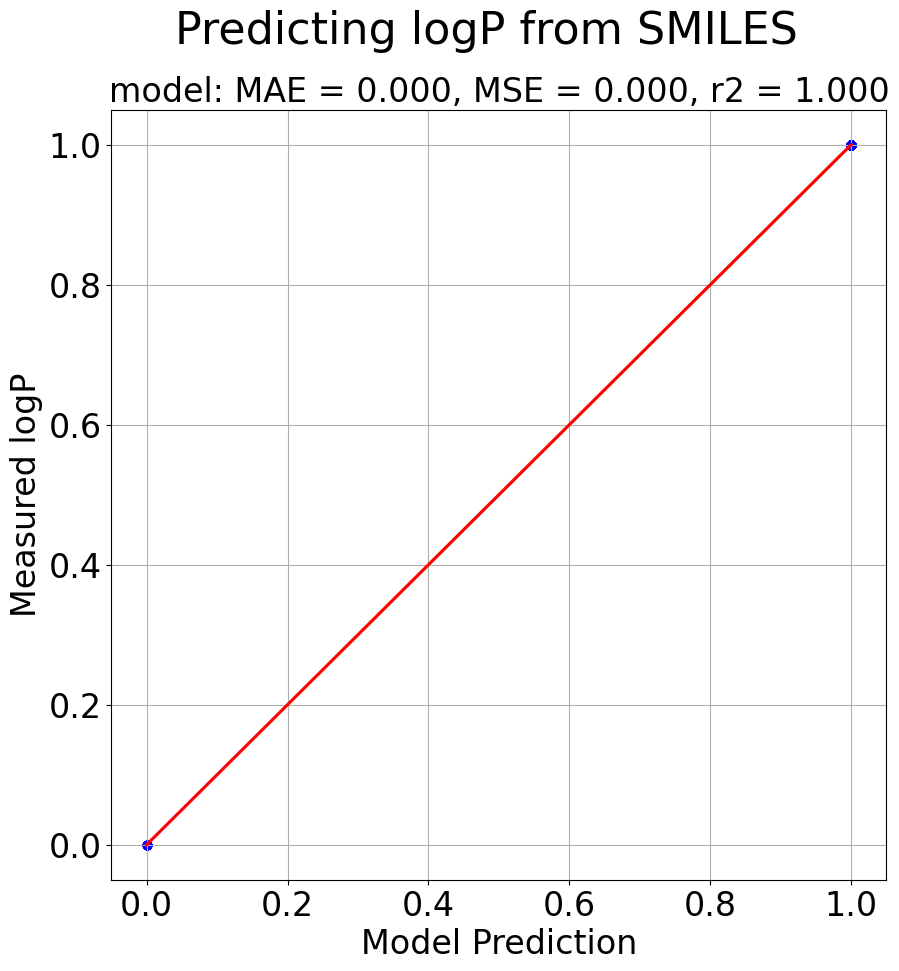

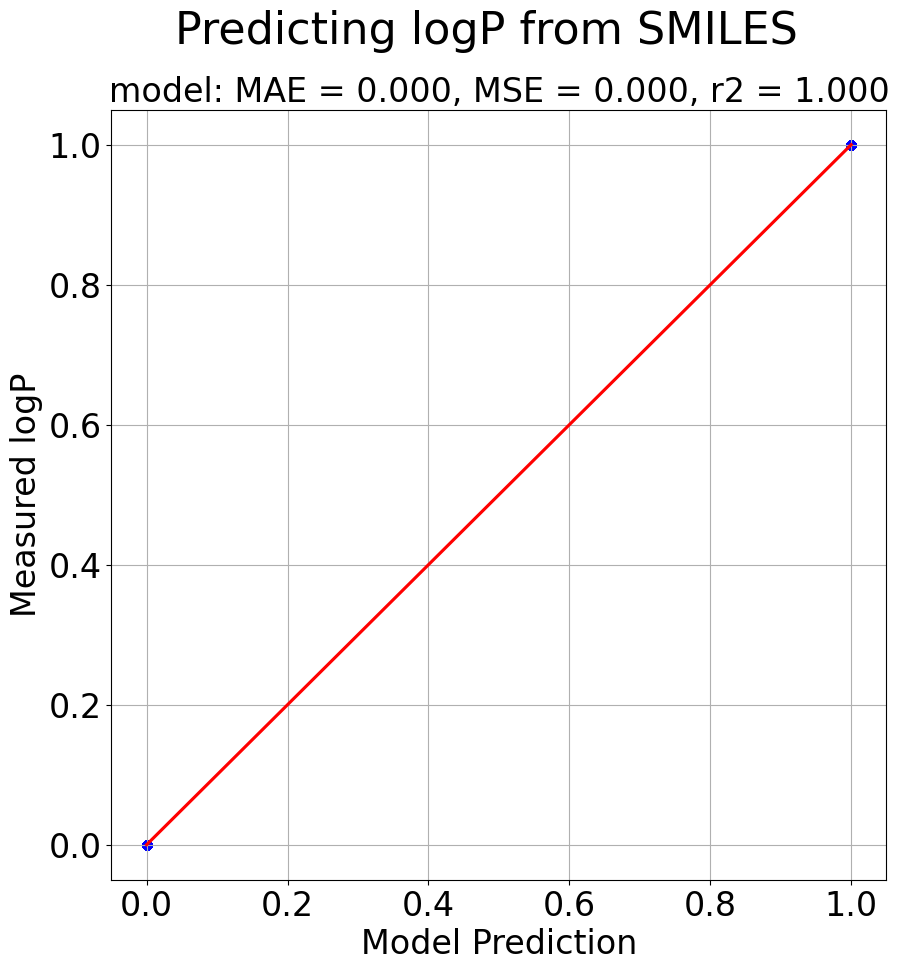

In [83]:
y = df_test_over['Outcome1'].values
X = df_test_over.drop(columns=["mol2vec_API","mol2vec_Excipient", "sentence_Excipient", "sentence_API","Structure_API","Structure_Excipient","mol_API", "mol_Excipient","Output Value"], axis =1)
y = df['Outcome1'].values
X = df.drop(columns=["mol2vec_API","mol2vec_Excipient", "sentence_Excipient", "sentence_API","Structure_API","Structure_Excipient","mol_API", "mol_Excipient","Output Value"], axis =1)
from sklearn.model_selection import train_test_split
X_train, X_remain, y_train, y_remain = train_test_split(X, y, test_size=.2, random_state=816)
X_val, X_test, y_val, y_test = train_test_split(X_remain, y_remain, test_size=.5, random_state=817)

from sklearn.linear_model import LassoLarsCV
Lasso_model = LassoLarsCV()
Lasso_model.fit(X_train, y_train)

def plot_evaluation(model, X_test, y_test, title="Test"):
    prediction = np.squeeze(model.predict(X_test))
    mae = mean_absolute_error(y_test, prediction)
    mse = mean_squared_error(y_test, prediction)
    r2 = r2_score(y_test, prediction)
    plt.figure(figsize=(10,10))
    sns.regplot(x=prediction, y=y_test, scatter_kws={"color": "blue"}, line_kws={"color": "red"});
    plt.xlabel('Model Prediction', fontsize=24);
    plt.ylabel('Measured logP', fontsize=24);
    plt.xticks(fontsize=24);
    plt.yticks(fontsize=24);
    plt.suptitle('Predicting logP from SMILES', fontsize=32);
    plt.title(f'{title}: MAE = {mae:.3f}, MSE = {mse:.3f}, r2 = {r2:.3f}', fontsize=24);
    plt.grid(True)

plot_evaluation(Lasso_model, X_test, y_test, "model")
plot_evaluation(Lasso_model, X_train, y_train, "model")

In [85]:
####